In [ ]:
# https://pennylane.ai/qml/demos/tutorial_quanvolution.html

In [ ]:
# !pip install --upgrade pip
# !pip install tensorflow

In [ ]:
# pip install --upgrade tensorflow

In [61]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.templates import RandomLayers
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


In [62]:
SAVE_PATH = "./Saved_Models/Quanvolution" # Data saving folder
PREPROCESS1 = False           # If False, skip quantum processing and load data from SAVE_PATH
np.random.seed(0)           # Seed for NumPy random number generator
tf.random.set_seed(0)       # Seed for TensorFlow random number generator

In [63]:
import os
from PIL import Image, ImageOps
from skimage import io
import pandas as pd
from skimage.transform import rescale, resize, downscale_local_mean

# Define the path to the dataset
train_data_path = "./Road_sign_Detection_Kaggle/Train"
csv_file = "./Road_sign_Detection_Kaggle/Train.csv"
df = pd.read_csv(csv_file)

# Get the list of subfolders in the dataset path
subfolders = sorted(os.listdir(train_data_path))

#### Defining no. of classes to be used in simulation ####
classes = ["1","2","3","4","5","7","8","9","10","11","12","13","14","15","17","18","23","25","26","28","31","33","35","38"]  # range 1-42

int_classes = list(map(int, classes))
print(int_classes)
annotations = df.loc[df['ClassId'].isin(int_classes)]
a = 0
for i in classes:
#     if i > classes:
#         break
    # Get the list of image files in the subfolder
    img_files = sorted(os.listdir(os.path.join(train_data_path, i)))
    a+=len(img_files)
    print(f'{int(i)} --> {len(img_files)} ---->> sum = {a}')
    
#print(annotations)

# Define the image size
img_size = (54, 54)

#total = (a//10)*10
total = a
test = int(total/5)
train = total - test
print(f'Total data = {total}')

# Get the list of subfolders in the dataset path
subfolders = sorted(os.listdir(train_data_path))

train_images = []
train_labels = []
test_images = []
test_labels = []


# Loop over the subfolders and load the images and labels
k = [] 
for i in classes:
#     if i > classes:
#         break
    # Get the list of image files in the subfolder
    img_files = sorted(os.listdir(os.path.join(train_data_path, i)))
    #print(img_files)
    # Loop over the image files and load the images
    for j, img_file in enumerate(img_files):
        
        if j>500:
            break
        # Open the image file using os
        img_path = os.path.join(train_data_path, i, img_file)
        img = io.imread(img_path, as_gray=True)
        #print(img.shape)
        s = "Train/"+str(i)+"/"+str(img_file)
        #print(s)
        k = annotations.loc[annotations['Path'] == s]
        #print(k)
        x1 = k.iloc[0, 2]
        y1 = k.iloc[0, 3]
        x2 = k.iloc[0, 4]
        y2 = k.iloc[0, 5]
        img = img[x1:x2,y1:y2]
        #print(img.shape)
        img = resize(img, img_size)
        #img = img.flatten()
        
#         if i == '15' :#and j == 0:
#             print(x1,y1,x2,y2)
        
        if j%5 != 0:
            train_images.append(np.expand_dims(img, axis=-1))
            train_labels.append(i)
#             train_images[k] = np.expand_dims(img, axis=-1)
#             train_labels[k] = i
            #k+=1
        elif j%5 == 0:
            test_images.append(np.expand_dims(img, axis=-1))
            test_labels.append(i)
#             test_images[l] = np.expand_dims(img, axis=-1)
#             test_labels[l] = i
            #l+=1
        #print("-----------------------------------------------------")
    

# Print the shape of the data and labels arrays
train_images = np.squeeze(train_images)
train_images = np.asarray(train_images)
train_labels = np.asarray(train_labels, dtype = 'uint8')
print("Train Data shape:", train_images.shape)
print("Labels shape:", train_labels.shape)

# Print the shape of the data and labels arrays
test_images = np.squeeze(test_images)
test_images = np.asarray(test_images)
test_labels = np.asarray(test_labels, dtype = 'uint8')
print("Test Data shape:", test_images.shape)
print("Labels shape:", test_labels.shape)

[1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 23, 25, 26, 28, 31, 33, 35, 38]
1 --> 2220 ---->> sum = 2220
2 --> 2250 ---->> sum = 4470
3 --> 1410 ---->> sum = 5880
4 --> 1980 ---->> sum = 7860
5 --> 1860 ---->> sum = 9720
7 --> 1440 ---->> sum = 11160
8 --> 1410 ---->> sum = 12570
9 --> 1470 ---->> sum = 14040
10 --> 2010 ---->> sum = 16050
11 --> 1320 ---->> sum = 17370
12 --> 2100 ---->> sum = 19470
13 --> 2160 ---->> sum = 21630
14 --> 780 ---->> sum = 22410
15 --> 630 ---->> sum = 23040
17 --> 1110 ---->> sum = 24150
18 --> 1200 ---->> sum = 25350
23 --> 510 ---->> sum = 25860
25 --> 1500 ---->> sum = 27360
26 --> 600 ---->> sum = 27960
28 --> 540 ---->> sum = 28500
31 --> 780 ---->> sum = 29280
33 --> 689 ---->> sum = 29969
35 --> 1200 ---->> sum = 31169
38 --> 2070 ---->> sum = 33239
Total data = 33239
Train Data shape: (9600, 54, 54)
Labels shape: (9600,)
Test Data shape: (2424, 54, 54)
Labels shape: (2424,)


In [64]:
print(len(classes))

24


In [65]:
# # Encode labels into one-hot vectors
# train_labels = tf.one_hot(train_labels, depth=24)
# test_labels = tf.one_hot(test_labels, depth=24)

In [66]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
train_labels = label_encoder.fit_transform(train_labels)
test_labels = label_encoder.fit_transform(test_labels)  


In [67]:
print(test_labels)

[ 0  0  0 ... 23 23 23]


In [68]:
print(len(train_labels))

9600


In [69]:
n_train = len(train_labels)
n_test = len(test_labels)

In [70]:
# Add extra dimension for convolution channels
train_images = np.array(train_images[..., tf.newaxis], requires_grad=False)
test_images = np.array(test_images[..., tf.newaxis], requires_grad=False)

In [71]:
print(train_images.shape,train_images.dtype, test_images.shape, test_images.dtype) 

(9600, 54, 54, 1) float64 (2424, 54, 54, 1) float64


In [72]:
train_labels.dtype

dtype('int64')

In [73]:
#pip install numpy==1.23

In [74]:
dev = qml.device("default.qubit", wires=9)
# Random circuit parameters
rand_params = np.random.uniform(high=2 * np.pi, size=(1, 9))

@qml.qnode(dev)
def circuit(phi):
    # Encoding of 9 classical input values
    for j in range(9):
        qml.RY(np.pi * phi[j], wires=j)

    # Random quantum circuit
    RandomLayers(rand_params, wires=list(range(9)))

    # Measurement producing 9 classical output values
    return [qml.expval(qml.PauliZ(j)) for j in range(9)]

In [75]:
def quanv(image):
    """Convolves the input image with many applications of the same quantum circuit."""
    out = np.zeros((18, 18, 9))

    # Loop over the coordinates of the top-left pixel of 3X3 squares
    for j in range(0, 54, 3):
        for k in range(0, 54, 3):
            # Process a squared 3x3 region of the image with a quantum circuit
            q_results = circuit(
                [
                    image[j, k, 0],
                    image[j, k + 1, 0],
                    image[j, k + 2, 0],
                    image[j + 1, k, 0],
                    image[j + 1, k + 1, 0],
                    image[j + 1, k + 2, 0],
                    image[j + 2, k, 0],
                    image[j + 2, k + 1, 0],
                    image[j + 2, k + 2, 0],               
                ]
            )
            # Assign expectation values to different channels of the output pixel (j/3, k/3)
            for c in range(9):
                out[j // 3, k // 3, c] = q_results[c]
    return out


In [76]:
if PREPROCESS1 == True:
    q_train_images = []
    print("Quantum pre-processing of train images:")
    for idx, img in enumerate(train_images):
        print("{}/{}        ".format(idx + 1, n_train), end="\r")
        q_train_images.append(quanv(img))
    q_train_images = np.asarray(q_train_images)

    q_test_images = []
    print("\nQuantum pre-processing of test images:")
    for idx, img in enumerate(test_images):
        print("{}/{}        ".format(idx + 1, n_test), end="\r")
        q_test_images.append(quanv(img))
    q_test_images = np.asarray(q_test_images)

    # Save pre-processed images
    np.save(SAVE_PATH + "(M1)multi_class_train.npy", q_train_images)
    np.save(SAVE_PATH + "(M1)multi_class_test.npy", q_test_images)



In [77]:
# Load pre-processed images
q_train_images = np.load(SAVE_PATH + "(M1)multi_class_train.npy")
q_test_images = np.load(SAVE_PATH + "(M1)multi_class_test.npy")

In [78]:
print(q_train_images.shape)

(9600, 18, 18, 9)


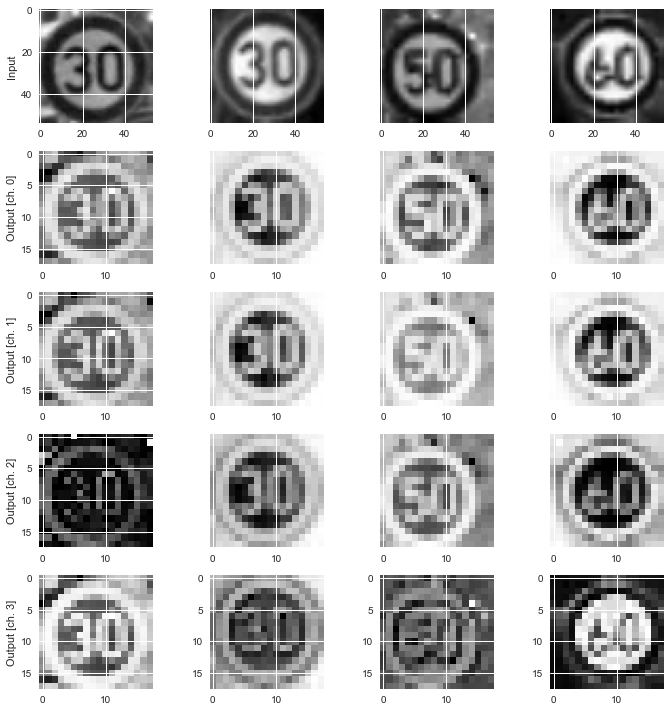

In [79]:
n_samples = 4
n_channels = 4
fig, axes = plt.subplots(1 + n_channels, n_samples, figsize=(10, 10))
for k in range(n_samples):
    axes[0, 0].set_ylabel("Input")
    if k != 0:
        axes[0, k].yaxis.set_visible(False)
    axes[0, k].imshow(train_images[k*300, :, :, 0], cmap="gray")

    # Plot all output channels
    for c in range(n_channels):
        axes[c + 1, 0].set_ylabel("Output [ch. {}]".format(c))
        if k != 0:
            axes[c, k].yaxis.set_visible(False)
        axes[c + 1, k].imshow(q_train_images[k*300, :, :, c], cmap="gray")

plt.tight_layout()
plt.show()

In [80]:
from qiskit import QuantumCircuit, assemble, Aer
from math import pi, sqrt
from qiskit.visualization import plot_bloch_multivector, plot_histogram
sim = Aer.get_backend('aer_simulator')
from qiskit.quantum_info import state_fidelity as fid

In [81]:
state_list=[]

for i in range(24):
    qc = QuantumCircuit(1)
    qc.rx(i*2*pi/24,0)
    qc.save_statevector()
    qobj = assemble(qc)
    state = sim.run(qobj).result().get_statevector()
    state_list.append(state.data)

stt = np.array(state_list)
stt[8]
#tf.convert_to_tensor(stt)

tensor([0.5+0.j       , 0. -0.8660254j], requires_grad=True)

In [82]:
import numpy

In [83]:
def my_metric_fn(y_true, y_pred):
    #idx=np.argmax(y_pred)
    #true=np.argmax(y_true)
    #for i in ypred:
   # print(sum(y_pred))
    #print(y_pred)
    #print(y_true)
    idx = np.argmax(y_pred,1)
    true = y_true.numpy()
    true = true.astype(int)
    true = true.flatten()
    #print(idx)
    #print(true)
    
    #print(len(idx))
    #print(len(true))
#     idx = tf.one_hot(idx, 24)
#     true = tf.one_hot(true, 24)
#     print(idx)
    
#     print(true)
#     idx = np.argmax(idx)
#     true = np.argmax(true)
#     print(idx)
#     print(true)
#     print(idx)
#     print('---------------------------------------------')
#     print(true)
#     print('---------------------------------------------')
#     print(stt[idx])
#     print('---------------------------------------------')
#     print(stt[idx].conj())
#     print('---------------------------------------------')
#     print(stt[true])
#     print('---------------------------------------------')
#     print(stt[idx].conj()*stt[true])
#     print('---------------------------------------------')
#     print(numpy.sum((stt[idx].conj()*stt[true]),axis=1))
#     print('---------------------------------------------')
#     print(tf.abs(numpy.sum((stt[idx].conj()*stt[true]),axis=1)))
#     print('---------------------------------------------')
#     print(tf.abs(numpy.sum((stt[idx].conj()*stt[true]),axis=1))**2)
#     print('---------------------------------------------')
    
    fid = tf.abs(numpy.sum((stt[idx].conj()*stt[true]),axis=1))**2
    return fid

In [ ]:
def MyModel():
    """Initializes and returns a custom Keras model
    which is ready to be trained."""
    
    model = keras.Sequential()
    model.add(keras.layers.Conv2D(filters=4, kernel_size=(3,3), activation = 'relu', padding = 'same', input_shape = (54,54,1)))
    model.add(keras.layers.MaxPool2D(pool_size=(3,3), strides=(3,3)))
    model.add(keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation = 'relu', padding = 'same'))
    model.add(keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))
    model.add(keras.layers.Flatten())
    #model.add(keras.layers.Dense(128, activation='relu'))
    #model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dense(len(classes), activation='softmax'))
    
    
#     model = keras.models.Sequential([
#         keras.layers.Flatten(),
#         keras.layers.Dense(43, activation="softmax")
#     ])
    opt = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(
        optimizer=opt,
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy", my_metric_fn],
        run_eagerly=True
    )
    return model


In [ ]:
c_model = MyModel()
c_model.summary()

In [ ]:
c_history = c_model.fit(
    train_images,
    train_labels,
    validation_data=(test_images, test_labels),
    batch_size=30,
    epochs=100,
    verbose=2,
)

In [84]:
def MyQModel():
    """Initializes and returns a custom Keras model
    which is ready to be trained."""
    
    model = keras.Sequential()
#     model.add(keras.layers.Conv2D(filters=4, kernel_size=(3,3), activation = 'relu', padding = 'same', input_shape = (28,28,1)))
#     model.add(keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))
    model.add(keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation = 'relu', padding = 'same', input_shape = (18,18,9)))
    model.add(keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))
    model.add(keras.layers.Flatten())
    #model.add(keras.layers.Dense(128, activation='relu'))
    #model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dense(len(classes), activation='softmax'))
    
    
#     model = keras.models.Sequential([
#         keras.layers.Flatten(),
#         keras.layers.Dense(43, activation="softmax")
#     ])
    opt = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(
        optimizer=opt,
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy", my_metric_fn],
        run_eagerly=True
    )
    return model


In [85]:
# import numpy
# def my_q_metric_fn(y_true, y_pred):
#     #idx=np.argmax(y_pred)
#     #true=np.argmax(y_true)
#     #for i in ypred:
#    # print(sum(y_pred))
#     #y_pred = y_pred.numpy()
#     #print(y_pred)
#     print(y_pred)
#     idx=tf.argmax(y_pred,1)
#     true=tf.argmax(y_true,1)  
#     print(idx.numpy())
#    # print(idx)
#     fid = tf.abs(tf.experimental.numpy.sum((stt[idx].conj()*stt[true]),axis=1))**2
#     return fid

In [86]:
q_model = MyQModel()
q_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 18, 18, 64)        5248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 9, 9, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 5184)              0         
                                                                 
 dense_3 (Dense)             (None, 24)                124440    
                                                                 
Total params: 129,688
Trainable params: 129,688
Non-trainable params: 0
_________________________________________________________________


In [87]:
q_history = q_model.fit(
    q_train_images,
    train_labels,
    validation_data=(q_test_images, test_labels),
    batch_size=30,
    epochs=100,
    verbose=2,
)

Epoch 1/100
320/320 - 6s - loss: 2.6191 - accuracy: 0.2915 - my_metric_fn: 0.6836 - val_loss: 2.1455 - val_accuracy: 0.4691 - val_my_metric_fn: 0.7830 - 6s/epoch - 19ms/step
Epoch 2/100
320/320 - 6s - loss: 1.8046 - accuracy: 0.5485 - my_metric_fn: 0.8277 - val_loss: 1.5480 - val_accuracy: 0.6229 - val_my_metric_fn: 0.8661 - 6s/epoch - 19ms/step
Epoch 3/100
320/320 - 6s - loss: 1.3583 - accuracy: 0.6615 - my_metric_fn: 0.8797 - val_loss: 1.2298 - val_accuracy: 0.6931 - val_my_metric_fn: 0.8875 - 6s/epoch - 19ms/step
Epoch 4/100
320/320 - 6s - loss: 1.0996 - accuracy: 0.7266 - my_metric_fn: 0.9031 - val_loss: 1.0348 - val_accuracy: 0.7360 - val_my_metric_fn: 0.9030 - 6s/epoch - 19ms/step
Epoch 5/100
320/320 - 6s - loss: 0.9274 - accuracy: 0.7664 - my_metric_fn: 0.9178 - val_loss: 0.8962 - val_accuracy: 0.7739 - val_my_metric_fn: 0.9159 - 6s/epoch - 19ms/step
Epoch 6/100
320/320 - 6s - loss: 0.8088 - accuracy: 0.7949 - my_metric_fn: 0.9274 - val_loss: 0.7892 - val_accuracy: 0.8016 - val_

In [88]:
# model=np.load('Quanvolution16_(M1)multi_class_test.npy')

In [89]:
# print(model)

C:\Users\fadhel97\AppData\Local\Temp\ipykernel_11228\3516837055.py:6: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax1.grid(b=False)
C:\Users\fadhel97\AppData\Local\Temp\ipykernel_11228\3516837055.py:7: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=False)
C:\Users\fadhel97\AppData\Local\Temp\ipykernel_11228\3516837055.py:8: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax3.grid(b=False)


NameError: name 'c_history' is not defined

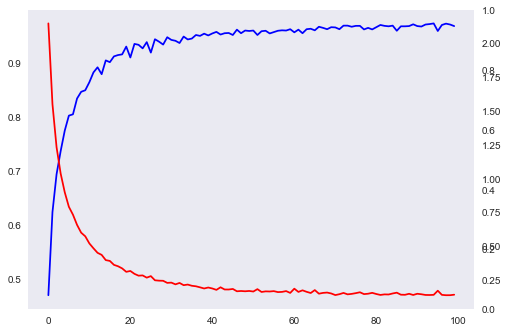

In [90]:
plt.style.use("seaborn")

fig, ax1 = plt.subplots(sharex=True, sharey=True)
ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax1.grid(b=False)
ax2.grid(b=False)
ax3.grid(b=False)

ax1.plot(q_history.history["val_accuracy"], "-b", label="HQCNN-val acc")
ax2.plot(q_history.history["val_loss"], "-r", label="HQCNN-val loss")
ax1.plot(c_history.history["val_accuracy"], "--b", label="CNN-val acc")
ax2.plot(c_history.history["val_loss"], "--r", label="CNN-val lass")
ax1.plot(q_history.history["my_metric_fn"], "-g", label="HQCNN Fidelity")
#ax1.plot(c_history.history["val_accuracy"], "--g", label="CNN Fidelity")
ax1.set_ylabel("Accuracy", color='b')
ax2.set_ylabel("Loss", color='r')
ax3.yaxis.set_label_coords(-0.1, 0.5)
ax3.set_ylabel("Fidelity", color='g')
ax3.set_yticklabels([])
ax1.set_ylim([0.3, 1])
# ax2.set_ylim([0.1, 1])
ax3.set_ylim([0.3, 1])
ax1.set_xlabel("Epoch")
ax1.legend(bbox_to_anchor=(0.9, 0.7))
ax2.legend(bbox_to_anchor=(0.905, 0.57))
# ax1.plot(c_history.history["val_accuracy"], "--b", label="Without quantum layer")
# ax1.plot(c_history.history["val_loss"], "--g", label="Without quantum layer")
#ax2.set_ylim(top=2.5)
#ax2.set_xlabel("Epoch")
#ax2.legend()
plt.tight_layout()
plt.show()

C:\Users\fadhel97\AppData\Local\Temp\ipykernel_11228\3004112581.py:6: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax1.grid(b=False)
C:\Users\fadhel97\AppData\Local\Temp\ipykernel_11228\3004112581.py:7: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=False)
C:\Users\fadhel97\AppData\Local\Temp\ipykernel_11228\3004112581.py:8: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax3.grid(b=False)


NameError: name 'c_history' is not defined

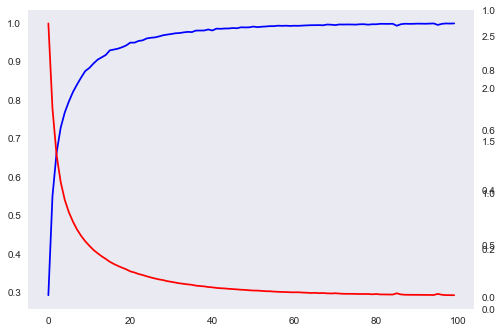

In [91]:
plt.style.use("seaborn")

fig, ax1 = plt.subplots(sharex=True, sharey=True)
ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax1.grid(b=False)
ax2.grid(b=False)
ax3.grid(b=False)

ax1.plot(q_history.history["accuracy"], "-b", label="HQCNN-val acc")
ax2.plot(q_history.history["loss"], "-r", label="HQCNN-val loss")
ax1.plot(c_history.history["accuracy"], "--b", label="CNN-val acc")
ax2.plot(c_history.history["loss"], "--r", label="CNN-val lass")
ax1.plot(q_history.history["my_metric_fn"], "-g", label="HQCNN Fidelity")
#ax1.plot(c_history.history["val_accuracy"], "--g", label="CNN Fidelity")
ax1.set_ylabel("Accuracy", color='b')
ax2.set_ylabel("Loss", color='r')
ax3.yaxis.set_label_coords(-0.1, 0.5)
ax3.set_ylabel("Fidelity", color='g')
ax3.set_yticklabels([])
ax1.set_ylim([0.3, 1])
# ax2.set_ylim([0.1, 1])
ax3.set_ylim([0.3, 1])
ax1.set_xlabel("Epoch")
ax1.legend(bbox_to_anchor=(0.9, 0.7))
ax2.legend(bbox_to_anchor=(0.905, 0.57))
# ax1.plot(c_history.history["val_accuracy"], "--b", label="Without quantum layer")
# ax1.plot(c_history.history["val_loss"], "--g", label="Without quantum layer")
#ax2.set_ylim(top=2.5)
#ax2.set_xlabel("Epoch")
#ax2.legend()
plt.tight_layout()
plt.show()

In [92]:
n = len(q_history.history["accuracy"]) # number of rows in the data
N = np.arange(1, n+1) # create a new column with values 1 to n
data_train = np.array([N, q_history.history["accuracy"], q_history.history["loss"], c_history.history["accuracy"], c_history.history["loss"], q_history.history["my_metric_fn"]]).T

NameError: name 'c_history' is not defined

In [93]:
data_val = np.array([N, q_history.history["val_accuracy"], q_history.history["val_loss"], c_history.history["val_accuracy"], c_history.history["val_loss"], q_history.history["my_metric_fn"]]).T

NameError: name 'c_history' is not defined

In [94]:
data_train

NameError: name 'data_train' is not defined

In [95]:
header = "N\tQAccuracy\tQLoss\tCAccuracy\tCLoss\tFidelity"
np.savetxt('Train_data_3x3.dat', data_train, delimiter='\t', header=header, comments='')

NameError: name 'data_train' is not defined

In [96]:
header = "N\tQAccuracy\tQLoss\tCAccuracy\tCLoss\tFidelity"
np.savetxt('Val_data_3x3.dat', data_val, delimiter='\t', header=header, comments='')

NameError: name 'data_val' is not defined

In [97]:
predictions = q_model.predict(q_test_images)

76/76 [==============================] - 0s 2ms/step


In [98]:
predictions

array([[9.52799082e-01, 1.08997097e-04, 1.08998108e-12, ...,
        6.35364605e-09, 2.08968704e-05, 5.54033022e-06],
       [9.63834584e-01, 3.23101121e-04, 9.46205336e-10, ...,
        4.60662131e-09, 8.77327636e-07, 6.84675342e-06],
       [9.97623861e-01, 1.29100087e-03, 1.86641049e-08, ...,
        6.73264333e-09, 2.50643790e-08, 1.50545340e-04],
       ...,
       [1.05077590e-04, 1.04579656e-09, 1.98653338e-18, ...,
        1.86388584e-24, 1.02084411e-13, 9.98409450e-01],
       [6.74960365e-11, 1.45938678e-11, 4.48623379e-26, ...,
        5.22388456e-29, 4.99972920e-14, 9.99855638e-01],
       [3.49771392e-11, 1.40251769e-10, 2.70499511e-26, ...,
        4.86487996e-24, 1.07707385e-10, 1.00000000e+00]], dtype=float32)

In [99]:
predictions.shape

(2424, 24)

In [100]:
n = 2424  # Number of elements
pred = [None for _ in range(n)]

In [101]:
for i in range(n):
    pred[i]=np.argmax(predictions[i])

In [102]:
tf.math.confusion_matrix(test_labels, pred)

<tf.Tensor: shape=(24, 24), dtype=int32, numpy=
array([[ 96,   1,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   2,   1,   0,   0,   0,   0,   0,   0],
       [  1,  95,   0,   1,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   1],
       [  0,   2,  89,   1,   8,   0,   0,   0,   0,   0,   1,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,  99,   0,   0,   0,   0,   0,   0,   0,   2,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 101,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   1,  98,   2,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,   1,   0,   0,   3,   1,  94,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   1,   0,   0,

In [103]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(test_labels, pred)

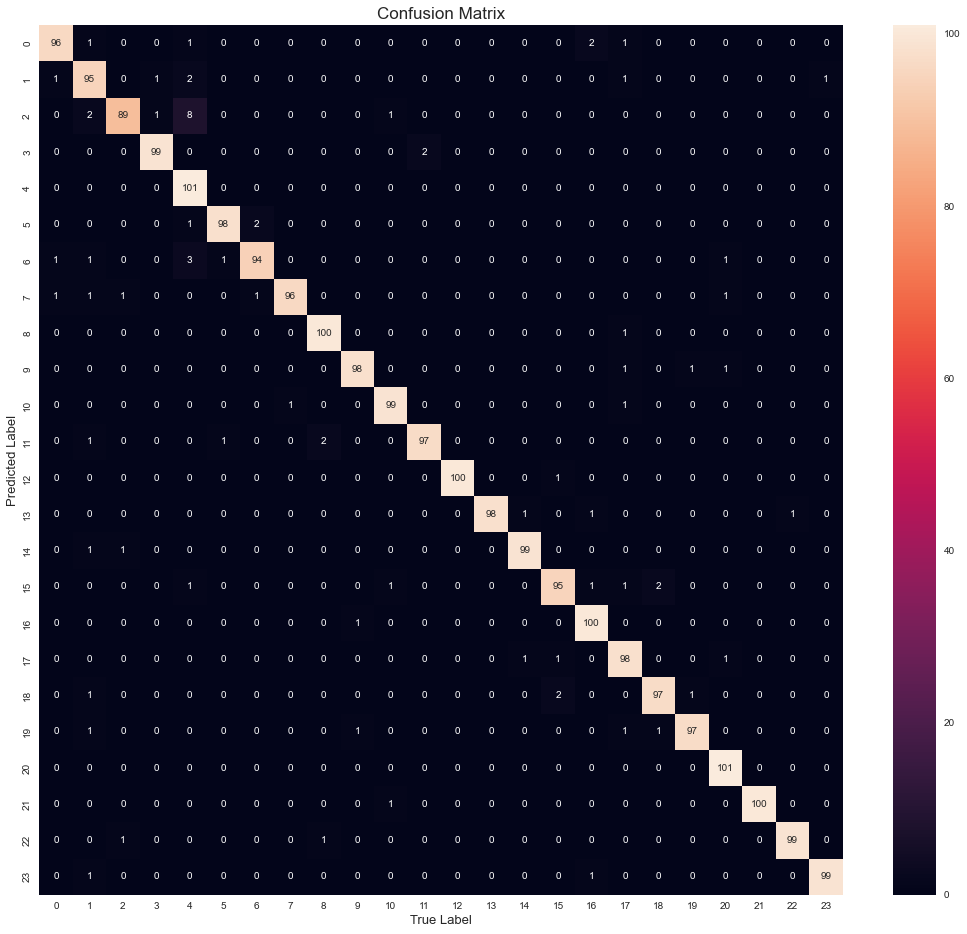

In [106]:
fig, ax = plt.subplots(figsize=(18,16))
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=class_names,
            yticklabels=class_names)
# plt.figure(figsize=(10,6))
plt.ylabel('Predicted Label',fontsize=13)
plt.xlabel('True Label',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [107]:
train_labels

array([ 0,  0,  0, ..., 23, 23, 23], dtype=int64)

In [108]:
pred[9599]

IndexError: list index out of range

In [109]:
print(classification_report(test_labels, pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       101
           1       0.90      0.94      0.92       101
           2       0.97      0.88      0.92       101
           3       0.98      0.98      0.98       101
           4       0.86      1.00      0.93       101
           5       0.98      0.97      0.98       101
           6       0.97      0.93      0.95       101
           7       0.99      0.95      0.97       101
           8       0.97      0.99      0.98       101
           9       0.98      0.97      0.98       101
          10       0.97      0.98      0.98       101
          11       0.98      0.96      0.97       101
          12       1.00      0.99      1.00       101
          13       1.00      0.97      0.98       101
          14       0.98      0.98      0.98       101
          15       0.96      0.94      0.95       101
          16       0.95      0.99      0.97       101
          17       0.93    

In [ ]:
from sklearn.metrics import plot_confusion_matrix

In [105]:
class_names = [str(i) for i in range(24)]

In [ ]:
class estimator:
  _estimator_type = ''
  classes_=[]
  def __init__(self, model, classes):
    self.model = model
    self._estimator_type = 'classifier'
    self.classes_ = classes
  def predict(self, X):
    y_prob= self.model.predict(X)
    y_pred = y_prob.argmax(axis=1)
    return y_pred

classifier = estimator(q_model, class_names)

In [ ]:
figsize = (16,16)
plt.grid(False)
plot_confusion_matrix(estimator=classifier, X=q_test_images, y_true=test_labels, ax=plt.subplots(figsize=figsize)[1])

In [ ]:
f=plot_confusion_matrix(estimator=classifier, X=test_images, y_true=test_labels, cmap='Blues', ax=plt.subplots(figsize=figsize)[1])
plt.savefig("foo.pdf", bbox_inches='tight')